In [13]:
import nltk
from nltk.corpus import wordnet as wn
from pathlib import Path
import pandas as pd
import math


nltk.download('wordnet')
word_sim = Path('.') / "data" / "WordSim353.csv"
word_sim = pd.read_csv(word_sim)
import networkx as nx
import matplotlib.pyplot as plt
from nltk.corpus.reader.wordnet import WordNetError

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [16]:

def build_wordnet_tree(path):
    G = nx.DiGraph()
    for i in range(len(path) - 1):
            G.add_edge(path[i].name(), path[i + 1].name())
    pos = nx.spring_layout(G, seed=42)  # Adjust the layout algorithm as desired
    return G 

def visualize_wordnet_tree(synset):
    G = build_wordnet_tree(synset )
    pos = nx.spring_layout(G, seed=42)  # Adjust the layout algorithm as desired
    plt.figure(figsize=(12, 8))
    nx.draw_networkx(G, pos, with_labels=True, node_size=2000, font_size=10)
    plt.axis('off')
    plt.show()


[Synset('entity.n.01'), Synset('entity.n.01'), Synset('physical_entity.n.01'), Synset('causal_agent.n.01'), Synset('person.n.01'), Synset('communicator.n.01'), Synset('negotiator.n.01'), Synset('representative.n.01'), Synset('head_of_state.n.01'), Synset('sovereign.n.01')]
[Synset('entity.n.01'), Synset('entity.n.01'), Synset('physical_entity.n.01'), Synset('object.n.01'), Synset('whole.n.02'), Synset('living_thing.n.01'), Synset('organism.n.01'), Synset('person.n.01'), Synset('communicator.n.01'), Synset('negotiator.n.01'), Synset('representative.n.01'), Synset('head_of_state.n.01'), Synset('sovereign.n.01')]
[Synset('entity.n.01'), Synset('entity.n.01'), Synset('physical_entity.n.01'), Synset('causal_agent.n.01'), Synset('person.n.01'), Synset('ruler.n.01'), Synset('sovereign.n.01')]
[Synset('entity.n.01'), Synset('entity.n.01'), Synset('physical_entity.n.01'), Synset('object.n.01'), Synset('whole.n.02'), Synset('living_thing.n.01'), Synset('organism.n.01'), Synset('person.n.01'), Sy

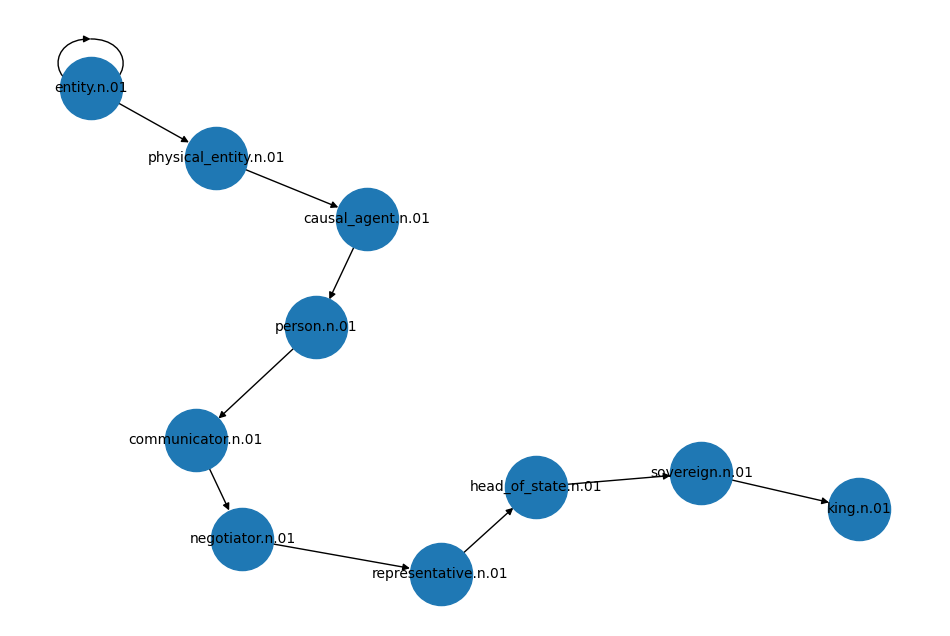

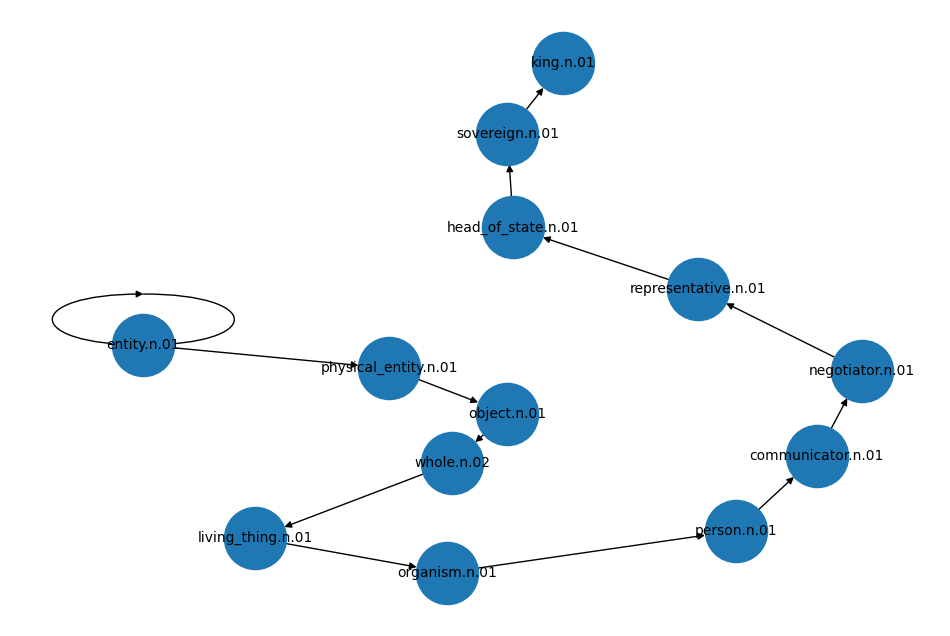

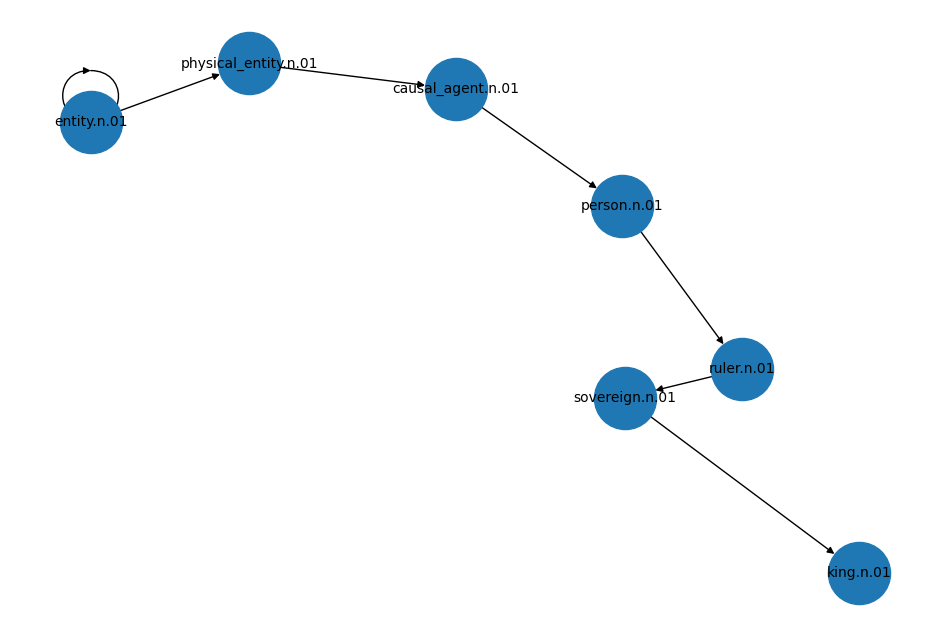

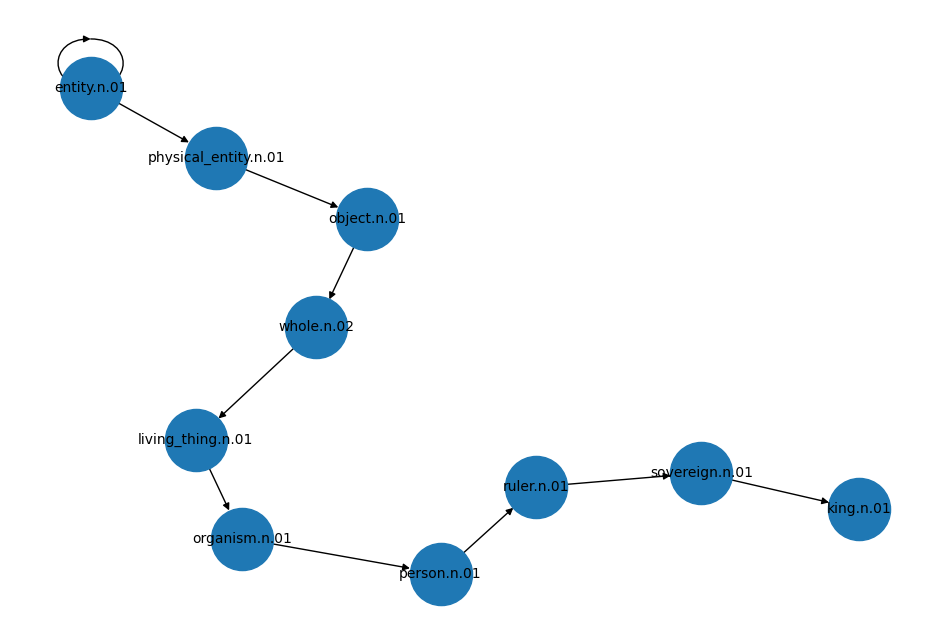

In [18]:

# creates all the possible paths from a synset to the root
# each path starts from the input synset 
def hypernym_paths(synset):
    paths = []
    hypernyms = synset.hypernyms()
    if not hypernyms:  # Base case: no more hypernyms
        return [[synset]]
    else:
        for hypernym in hypernyms:
            subpaths = hypernym_paths(hypernym)
            paths.extend([path + [hypernym] for path in subpaths])
    return paths
synset = wn.synset('king.n.01')
paths = hypernym_paths(synset)
for path in paths:
    print(path)

# visualize each path in different trees
def visualize_wordnet_paths(paths, startSynset=None):
        for path in paths:
            path.append(startSynset)
            visualize_wordnet_tree(path)
            
visualize_wordnet_paths(paths,synset)

